<a href="https://colab.research.google.com/github/Karthikeya0612/opms_megathon/blob/main/soil_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                      

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


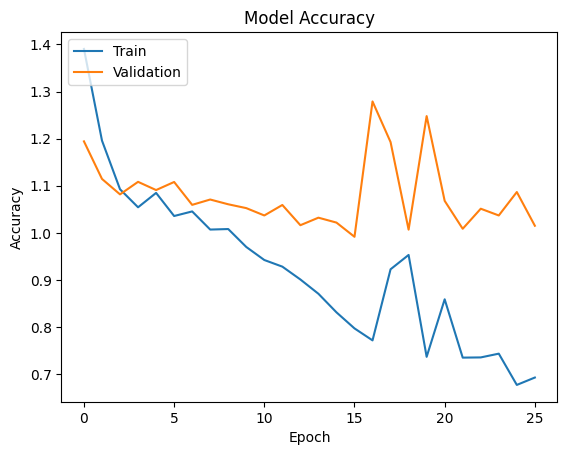

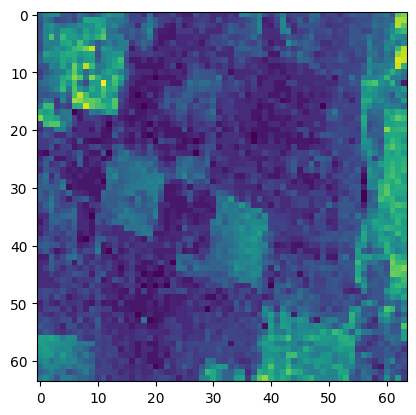

1/1 [==============================] - 0s 66ms/step
True Soil Type: alluvial soil, Predicted Soil Type: alluvial soil


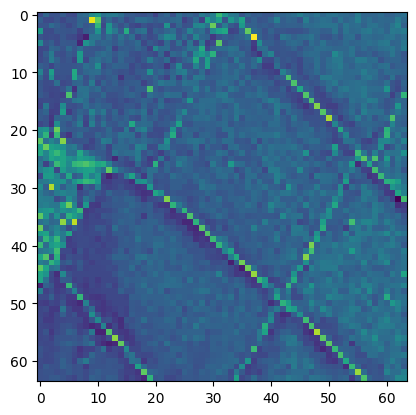

1/1 [==============================] - 0s 17ms/step
True Soil Type: black soil , Predicted Soil Type: red soil 


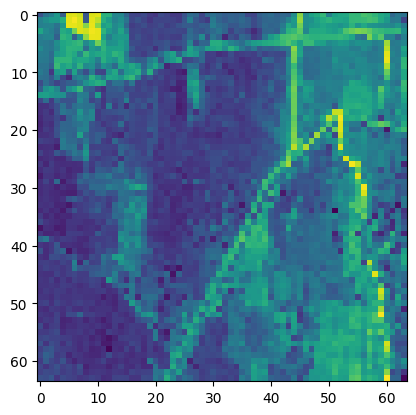

1/1 [==============================] - 0s 17ms/step
True Soil Type: alluvial soil, Predicted Soil Type: red soil 


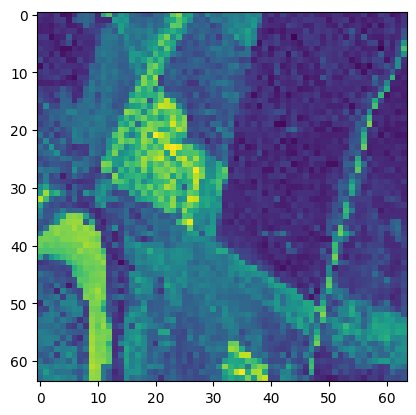

1/1 [==============================] - 0s 16ms/step
True Soil Type: alluvial soil, Predicted Soil Type: alluvial soil


In [24]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import *
from keras.models import *
import tensorflow as tf



path = "/content/drive/MyDrive/dataset_soil/"
files = os.listdir(path)
images = []
labels = []

for file in files:
    image = cv2.imread(os.path.join(path, file), 0)
    image = cv2.resize(image, dsize=(64, 64))
    image = image.reshape((image.shape[0], image.shape[1], 1))
    images.append(image)
    label = file.split('_')[1]
    labels.append(label)
for i in range(len(labels)):
  if(labels[i]=='alluvial'):
    labels[i]=0
  elif(labels[i]=='black'):
    labels[i]=1
  elif(labels[i]=='red'):
    labels[i]=2

target = np.array(labels)
features = np.array(images, dtype='float32') / 255.0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.4)

inputs = Input(shape=(64, 64, 1))
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
x = Dropout(0.25)(pool2)
flat = Flatten()(x)


soil_model = Dense(64, activation='relu')(flat)
soil_model = Dense(4, activation='softmax')(soil_model)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min',
                                                  verbose = 1, patience = 10)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                                 patience=5, min_lr=0.0001)
model = Model(inputs=inputs, outputs=soil_model)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


h = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=128,callbacks = [early_stopping
                                     ],)


model.save('soil_classification_model.h5')


plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


def display(img):
    plt.imshow(img[:, :, 0])
    #plt.set_cmap('gray')
    plt.show()
actual_label=['alluvial soil','black soil ','red soil ','sandy soil']
sample_indexes = [15, 25, 35, 45]
for idx in sample_indexes:
    sample = images[idx]
    display(sample)
    true_soil_type = labels[idx]
    predicted_soil_type = model.predict(np.array([sample]))[0].argmax()
    print(f"True Soil Type: {actual_label[true_soil_type]}, Predicted Soil Type: {actual_label[predicted_soil_type]}")


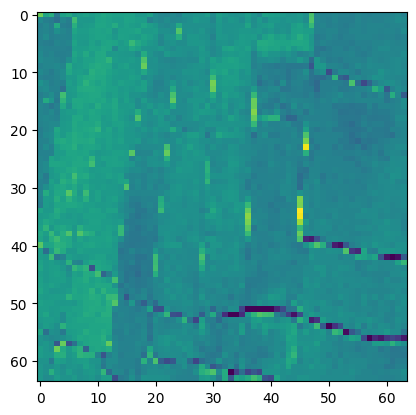

1/1 [==============================] - 0s 17ms/step
Predicted Soil Type: red soil 
red soil  is suitable to plant paddy crops such as ['BPT 5204', 'Swarna', 'MTU 1010', 'NLR 145']


In [25]:
paddy_compatibility = {
    "0": ["Sona Masuri", "BPT 5204", "Swarna", "MTU 1010", "NLR 145"],
    "1": ["Sona Masuri", "BPT 5204", "MTU 1010"],
    "2": ["BPT 5204", "Swarna", "MTU 1010", "NLR 145"],
    "3":["not suitable for rice cultivation"]
}
actual_label=['alluvial soil','black soil ','red soil ','sandy soil']
idx=78
sample = images[idx]
display(sample)
rue_soil_type = labels[idx]
predicted_soil_type = model.predict(np.array([sample]))[0].argmax()
print(f"Predicted Soil Type: {actual_label[predicted_soil_type]}")
print(f"{actual_label[predicted_soil_type]} is suitable to plant paddy crops such as {paddy_compatibility[str(predicted_soil_type)]}")


In [26]:
target[78]

1

In [27]:
pip install geoplot

In [28]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/dataset - Sheet1.csv")


In [29]:
data.iloc[21,3]=11

In [30]:
data

,District,Red Soil Percentage,Black Soil Percentage,Alluvial Soil Percentage,Sandy Soil Percentage
0,Adilabad,40,30,30,0
1,Bhadradri Kothagudem,35,30,35,0
2,Hyderabad,50,50,0,0
3,Jagtial,40,30,30,0
4,Jangaon,60,40,0,0
5,Jayashankar Bhupalpally,40,30,30,0
6,Jogulamba,35,30,35,0
7,Kamareddy,60,40,0,0
8,Karimnagar,40,30,30,0
9,Khammam,35,30,35,0


In [31]:
data.set_index('District', inplace=True)

Text(0.5, 1.0, 'Percentage Distribution of Data Across Columns')

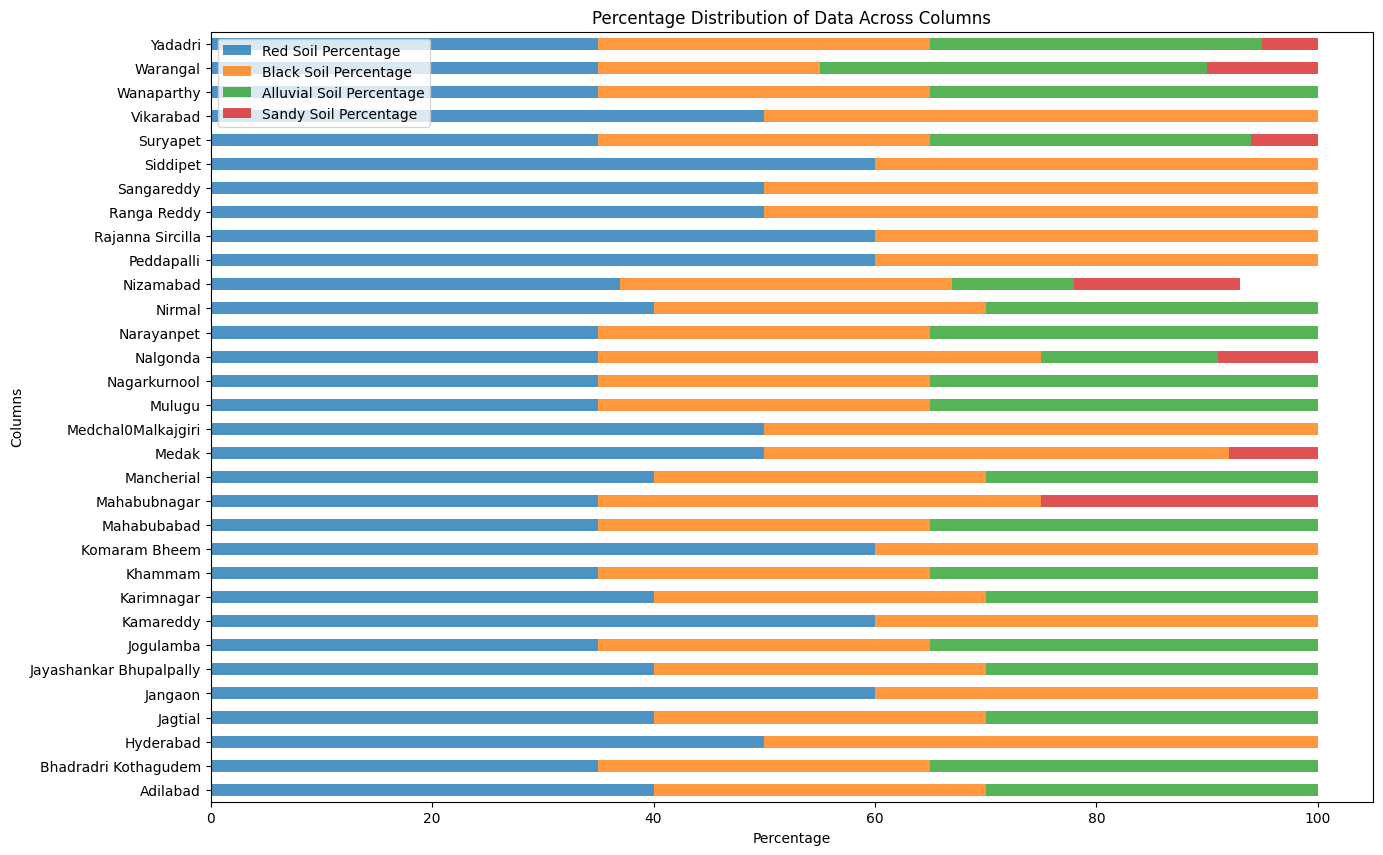

In [32]:
import seaborn as sns
ax = data.plot(kind='barh', stacked=True, alpha=0.8,figsize=(15,10))
ax.set_xlabel('Percentage')
ax.set_ylabel('Columns')
ax.set_title('Percentage Distribution of Data Across Columns')

In [33]:
df=pd.read_csv("/content/Area under different Crops.csv")

In [39]:
df=df.drop(2)

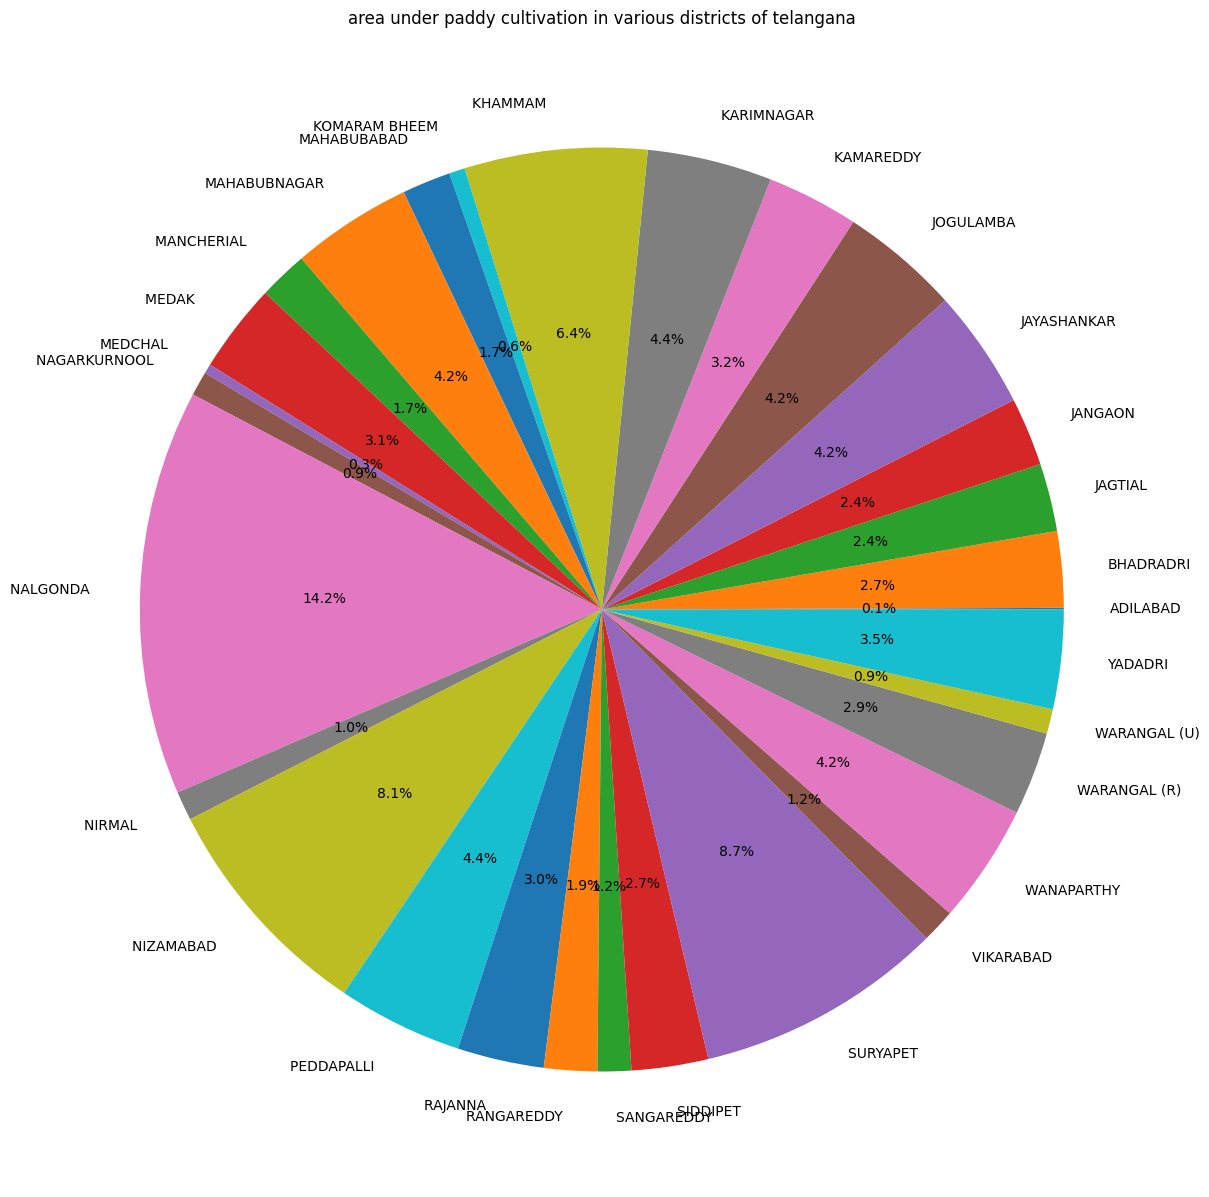

In [45]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.pie(df['Rice'], labels=df['Districts'], autopct='%1.1f%%',)

# Add title to the chart
ax.set_title('area under paddy cultivation in various districts of telangana')

# Show the chart
plt.show()

In [49]:
ds1=pd.read_csv(r"/content/production.csv")

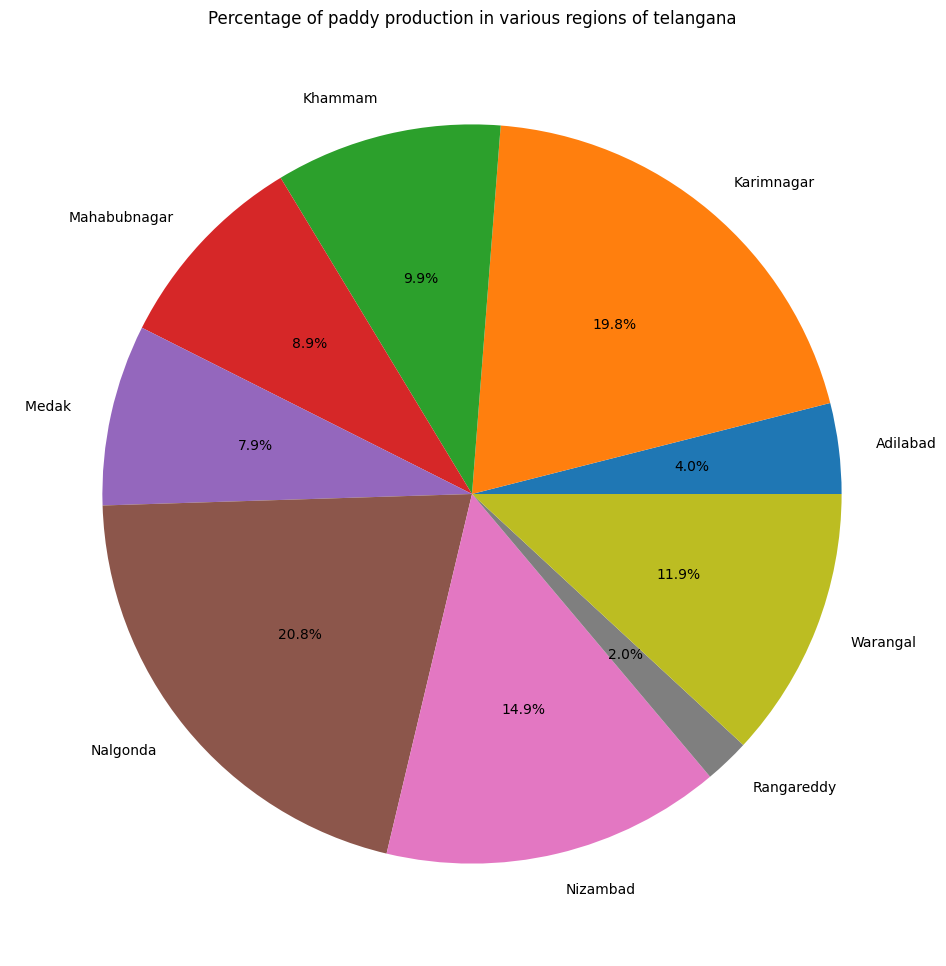

In [56]:
fig1, ax1 = plt.subplots(figsize=(12,12))
ax1.pie(ds1['Paddy Production(%)'], labels=ds1['District'], autopct='%1.1f%%',)

# Add title to the chart
ax1.set_title('Percentage of paddy production in various regions of telangana')

# Show the chart
plt.show()